## TRAIN TEST SPLIT

In [1]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## CHARGER LES DONNES, INITIALISER X et Y

Dimension :  (150, 4)


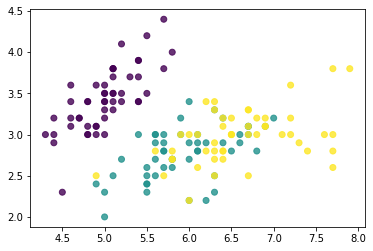

In [2]:
# chargement du dataset des fleurs d'iris
iris = load_iris()

# préparation des tableaux
X= iris.data
y = iris.target

print('Dimension : ',X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.show()

## DIVISER LE DATASET TRAIN SET ET TEST SET

In [3]:
# division du dataset :

#  chargement de la librairie train_test_split 
from sklearn.model_selection import train_test_split

# on prépare les différents tableaux avec le pourcentage de données
# à mettre dans le train set et test set : test_size=0.5 50/50 0.2 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Nbr éléments train set ? :', X_train.shape)
print('Nbr éléments test set ? :', X_test.shape)


Nbr éléments train set ? : (120, 4)
Nbr éléments test set ? : (30, 4)


Text(0.5, 1.0, 'Test set')

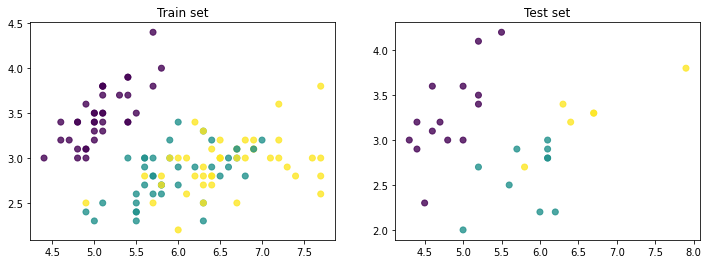

In [4]:
#  dessiner les valeurs du train set et test set
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

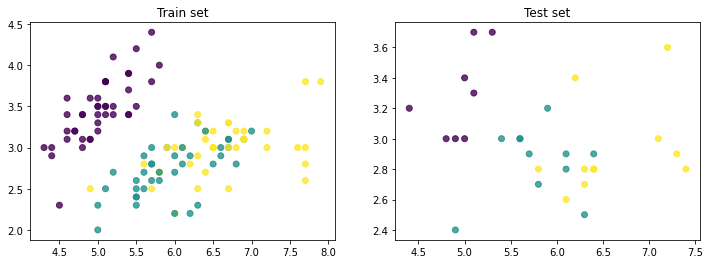

In [5]:
#  pour fixer, le tri aléatoire avant la division et avoir 
# le même résultat toujours ==> ajouter random_state=int

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

#  dessiner les valeurs du train set et test set
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.show()

## ENTRAINER LE MODELE 

In [6]:
#  entrainer le model de type KNClassifier

# chargement de la librairie
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# générer le modèle en fixant le nombre de voisins à 1
modele = KNeighborsClassifier(n_neighbors=1)

# nourir le modèle
modele.fit(X_train, y_train)
print('Train score : ', modele.score(X_train, y_train))
#  score de 100%? 100 % des prédictions ==> non

Train score :  1.0


## EVALUER LE MODELE

In [8]:
# performance future du modèle ==> entraine sur le test set
print('Test score : ', modele.score(X_test, y_test))
#  le résultat dans la vraie vie est de 90%

Test score :  0.9


In [9]:
# un data scientist doit améliorer le score à 91%...
#  en réglant les hyperparamètres : ex n_neighbors=3
modele = KNeighborsClassifier(n_neighbors=3)

# nourir le modèle
modele.fit(X_train, y_train)
print('Train score : ', modele.score(X_train, y_train))
print('Test score : ', modele.score(X_test, y_test))
#  93 % mieux

Train score :  0.975
Test score :  0.9333333333333333


In [10]:
# un data scientist doit améliorer le score à 91%...
# en réglant les hyperparamètres : ex n_neighbors=6
modele = KNeighborsClassifier(n_neighbors=6)

# nourir le modèle
modele.fit(X_train, y_train)
print('Train score : ', modele.score(X_train, y_train))
print('Test score : ', modele.score(X_test, y_test))
#  96 % mieux

Train score :  0.9833333333333333
Test score :  0.9666666666666667


## CROSS VALIDATION

In [11]:
# importer la librairie cross validation
from sklearn.model_selection import cross_val_score

In [12]:
# faire passer le modèle dans cross_val_score, les train set, 
# le nombre de split de données et en option quelle métrique on veut
# pour évaluer le modèle
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [13]:
# on obtient 5 scores pour nos 5 splits de cross-validation

In [14]:
# on en fait la moyenne 
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

In [15]:
#  on peut évaluer différents modèle en fonction des hyperparamètres
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv=5, scoring='accuracy').mean()

0.975

In [16]:
cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

In [17]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring='accuracy').mean()

0.975

In [18]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

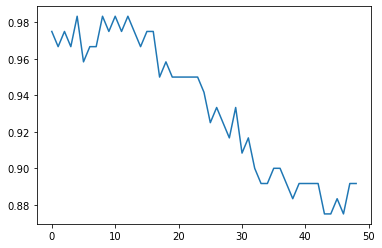

In [19]:
# on peut faire une boucle for en stockant dans une liste
# et afficher dans matplotlib
val_score = []
for k in range (1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)
plt.show()    

## VALIDATION CURVE

In [20]:
# chargement de la librairie
from sklearn.model_selection import validation_curve

In [21]:
# génération du modèle
model = KNeighborsClassifier()
k = np.arange(1, 50) # liste de 1 à 49

# on passe le modèle, le train set, le nom de
# l'hyperparametre à régler, itérateur des valeurs à tester
# et le nombre de découpes dans le dataset train
train_score, val_score = validation_curve(model, X_train, y_train, 
                                         'n_neighbors', k, cv=5)

C:\Users\Outils\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [22]:
val_score.shape
# 49 lignes pour les 49 valeurs testées et 5 colonnes pour les 5 splits

(49, 5)

In [23]:
# faire la moyenne de chaque ligne ==> axe =1 col/col
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

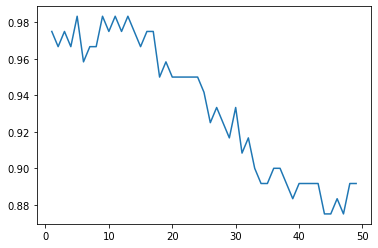

In [24]:
# afficher le tableau dans matplotlib du score du validation set
plt.plot(k, val_score.mean(axis=1))
plt.show()

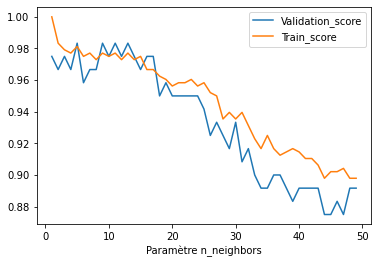

In [25]:
# en ajoutant le score du train set
# validation set
plt.plot(k, val_score.mean(axis=1), label='Validation_score')
plt.plot(k, train_score.mean(axis=1), label='Train_score')
plt.xlabel('Scores')
plt.xlabel('Paramètre n_neighbors')
plt.legend()

plt.show()

In [26]:
# très bien pour trouver l'overfitting si le score du train set est 
# très bons et le score du test set final est moyen

## GRIDSEARCHCV

In [27]:
# charger la  librairie
from sklearn.model_selection import GridSearchCV

In [28]:
# création d'un dictionnaire qui contient les hyperparamètres à régler
# ainsi que chaque valeur à tester pour ces hyperparamètres
param_grid = {'n_neighbors' : np.arange(1,20),
              'metric' : ['euclidean','manhattan']}

# on fait passer le modèle dans gridsearchcv, le dictionnaire 
# et nbre découpes
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# on entraine le modèle comme si grid était un estimateur
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [29]:
# modèle avec le meilleur score :
grid.best_score_
# 98% pas mal

0.9833333333333334

In [30]:
# paramètres pour le meilleur score
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [31]:
# sauvegarde du meilleur modèle
model = grid.best_estimator_

In [32]:
# évalutation de ce meilleur modèl dans test set pour voir performance
model.score(X_test, y_test)
# 93%

0.9333333333333333

## CONFUSION MATRIX

In [33]:
# chargement de la librairie
from sklearn.metrics import confusion_matrix

In [34]:
# on fait passer à confusion metrix nos vraies données y_test,
# et ce qu'on est censé obtenir comme prévision : model.predict(X_test)
confusion_matrix(y_test, model.predict(X_test))
# on obtient une matrice carrée 3/3 car 3 classe de fleurs dans le data set
# permet de voir où sont les erreurs dans notre modèle

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

In [35]:
# modèle meilleur si on lui fournit plus de données?
# ==> les courbes d'apprentissage

## LEARNING CURVE

In [36]:
# chargement de la librairie
from sklearn.model_selection import learning_curve

In [39]:
# on fait passer le modèle, les données du train set et nbre découpes
# et les quantités de données à utiliser pour l'entrainement
#  mais on fait passer des pourcentage, de début, fin 
# et un nombre de lots à avoir
N, train_score, val_score = learning_curve(model, X_train, y_train, 
               train_sizes = np.linspace(0.1, 1.0, 10), cv=5)
print(N)
# 19 points dans le 1er lot,  dans le second...

[ 9 19 28 38 48 57 67 76 86 96]


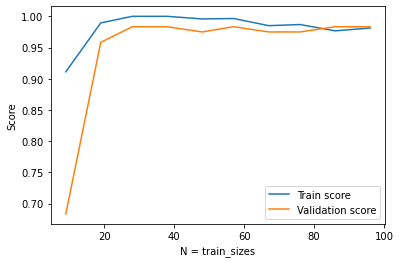

In [40]:
# tracer le graphique
plt.plot(N, train_score.mean(axis=1), label='Train score')
plt.plot(N, val_score.mean(axis=1), label='Validation score')
plt.xlabel('N = train_sizes')
plt.ylabel('Score')
plt.legend()
plt.show()
# 60 points suffit car le recueil des données est honéreux

## CORRECTION EXERCICE VIDEO 20

BEST n_neighbors :  2


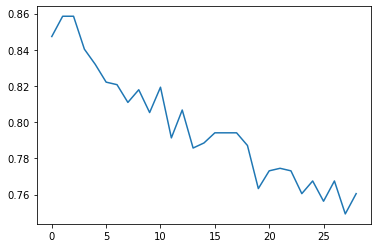

In [55]:
# modifier le nombre de voisins dans l'alglo KNeighborsClassifier
# pour trouver quel est la valeur de l'hyper paramètre qui nous donne
# le meilleur performance pourcentage sur le dataset
# si parmi 5 voisins les plus proches ont survécu et 1 non,
# l'algo considérera que je vais survivre
# paramètre entre 0 et 10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# -------------------------------------------------------------
# -- PREPARATION DES DONNEES
# -------------------------------------------------------------

# chargement du dataset
titanic = sns.load_dataset('titanic')

# filtrage du dataset
# sélection que de certaines colonnes
titanic = titanic[['survived','pclass','sex','age']]
# suppression des lignes avec données manquantes
titanic.dropna(axis=0, inplace=True)
# remplacer les catégories sexes par un integer 0 pour male,1 pour female
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)

# -------------------------------------------------------------
# -- MODELISATION MACHINE LEARNING APPRENTISSAGE SUPERVISE
# -------------------------------------------------------------

#  initialisation du modèle
model = KNeighborsClassifier()

y = titanic['survived']
#  suppresion de colonne survived ==> axes=1
X = titanic.drop('survived', axis=1)

# -------------------------------------------------------------
# -- ENTRAINEMENT
# -------------------------------------------------------------

# entrainement du modèle
model.fit(X, y)

# évalution du modèle
# model.score(X, y)
# on obtient 83% .. pas terrible


score = []
best_k = 1
best_score = 0

model.predict(X)

# -------------------------------------------------------------
# -- EVALUATION
# -------------------------------------------------------------

#  initialisation du modèle avec hyperparamètre entre 0 et 10
for k in range (best_k,30):
    model = KNeighborsClassifier(n_neighbors=k)
    # entrainement du modèle
    model.fit(X, y)
    # évalution du modèle
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print('BEST n_neighbors : ',best_k)
plt.plot(score)
plt.show()

In [56]:
#  mais approche mauvaise, il faut spliter le data set, train validate

## EXERCICE VIDEO 21

In [57]:
# 1. Créer un Train set et un Test set. Entrainer puis évaluer.
# 2. Avec GridSearchCV, trouver les meilleurs hyperparamètres n_neighbors,
# metrics et weights
# 3. est-ce que collecter des données serait utile?

### 1. Créer un Train set et un Test set. Entrainer puis évaluer.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# -------------------------------------------------------------
# -- PREPARATION DES DONNEES
# -------------------------------------------------------------

# chargement du dataset
titanic = sns.load_dataset('titanic')

# filtrage du dataset
# sélection que de certaines colonnes
titanic = titanic[['survived','pclass','sex','age']]
# suppression des lignes avec données manquantes
titanic.dropna(axis=0, inplace=True)
# remplacer les catégories sexes par un integer 0 pour male,1 pour female
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)

# -------------------------------------------------------------
# -- MODELISATION MACHINE LEARNING APPRENTISSAGE SUPERVISE
# -------------------------------------------------------------

#  initialisation du modèle
model = KNeighborsClassifier()

y = titanic['survived']
#  suppresion de colonne survived ==> axes=1
X = titanic.drop('survived', axis=1)

# -------------------------------------------------------------
# -- ENTRAINEMENT
# -------------------------------------------------------------

# entrainement du modèle
model.fit(X, y)

# évalution du modèle
score_no_training = model.score(X, y)
print('Score sans entrainement : ', score_no_training*100, '%')

# -------------------------------------------------------------
# -- DIVISION DU DATASET
# -------------------------------------------------------------

# division du dataset :

#  chargement de la librairie train_test_split 
from sklearn.model_selection import train_test_split

# on prépare les différents tableaux avec le pourcentage de données
# à mettre dans le train set et test set : test_size=0.5 50/50 0.2 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 5)

print('Nbr éléments train set ? :', X_train.shape)
print('Nbr éléments test set ? :', X_test.shape)

# print('X_train :', X_train)

#  dessiner les valeurs du train set et test set
# plt.figure(figsize=(12,4))
# plt.subplot(121)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
# plt.title('Train set')
# plt.subplot(122)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
# plt.title('Test set')
# plt.show()

# -------------------------------------------------------------
# -- ENTRAINER TRAIN SET
# -------------------------------------------------------------

# générer le modèle en fixant le nombre de voisins à 6
modele = KNeighborsClassifier(n_neighbors=2)

# nourir le modèle
modele.fit(X_train, y_train)
print('Train score : ', modele.score(X_train, y_train)*100, '%')

# -------------------------------------------------------------
# -- EVALUER TEST SET
# -------------------------------------------------------------

# performance future du modèle ==> entraine sur le test set
print('Test score : ', modele.score(X_test, y_test)*100)


Score sans entrainement :  83.19327731092437 %
Nbr éléments train set ? : (571, 3)
Nbr éléments test set ? : (143, 3)
Train score :  84.93870402802102 %
Test score :  79.72027972027972


### 2. Avec GridSearchCV, trouver les meilleurs hyperparamètres n_neighbors, metrics et weights

In [74]:
# -------------------------------------------------------------
# -- GRIDSEARCHCV
# -------------------------------------------------------------

# charger la  librairie
from sklearn.model_selection import GridSearchCV

# création d'un dictionnaire qui contient les hyperparamètres à régler
# ainsi que chaque valeur à tester pour ces hyperparamètres
param_grid = {'n_neighbors' : np.arange(1,60),
              'metric' : ['euclidean','manhattan','chebyshev',
                         'minkowski','wminkowski','seuclidean'], 
                          'weights' : ['uniform','distance']}

# on fait passer le modèle dans gridsearchcv, le dictionnaire 
# et nbre découpes
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# on entraine le modèle comme si grid était un estimateur
grid.fit(X_train, y_train)

# modèle avec le meilleur score :
print('Meilleur score : ', grid.best_score_)
# % pas mal

# paramètres pour le meilleur score
print('Meilleurs paramètres : ', grid.best_params_)

# sauvegarde du meilleur modèle
best_model = grid.best_estimator_

# évalutation de ce meilleur modèl dans test set pour voir performance
print('Meilleur score du meilleur modèle :', model.score(X_test, y_test))
# %

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 589, in sklearn.neighbors._dist_metrics.WMinkowskiDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Outils\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 446, in sklearn.neighbors._dist_metrics.SEuclideanDistance.__init__
TypeE

Meilleur score :  0.7828985507246375
Meilleurs paramètres :  {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Meilleur score du meilleur modèle : 0.8391608391608392


### 3. Collecter des données serait utile?

In [75]:
# CONFUSION MATRICE

# chargement de la librairie
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[79,  9],
       [14, 41]], dtype=int64)

[ 45  91 136 182 228 273 319 364 410 456]


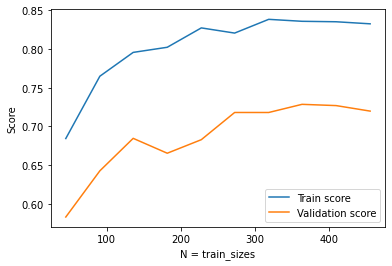

In [76]:
#  LEARNING CURVE

# chargement de la librairie
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, 
               train_sizes = np.linspace(0.1, 1.0, 10), cv=5)
print(N)

# tracer le graphique
plt.plot(N, train_score.mean(axis=1), label='Train score')
plt.plot(N, val_score.mean(axis=1), label='Validation score')
plt.xlabel('N = train_sizes')
plt.ylabel('Score')
plt.legend()
plt.show()
# OUI